In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [2]:
iris = load_iris()
# create X (features) and y (response)
X = iris.data
y = iris.target

In [3]:
# use train/test split with different random_state values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=4)

# check classification accuracy of KNN with K=5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.9736842105263158




Question: What if we created a bunch of train/test splits, calculated the testing accuracy for each, and averaged the results together?

Answer: That's the essense of cross-validation!


Steps for K-fold cross-validation

    Split the dataset into K equal partitions (or "folds").
    Use fold 1 as the testing set and the union of the other folds as the training set.
    Calculate testing accuracy.
    Repeat steps 2 and 3 K times, using a different fold as the testing set each time.
    Use the average testing accuracy as the estimate of out-of-sample accuracy.

in leyman terms, we are selecting a number (K), and we are dividing the datset in to K chunks.
and in a lopp K time, we are training our model K-1 times and testing the score using the 1 chunk we left in K-1.

after the loop gets ended we are summing the K scores and diving it by K.
and thus getting the average score


In [4]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5, shuffle=False).split(range(10))

# print the contents of each training and testing set
print('{} {:^1} {}'.format('Iteration','\t Training set observations',     '\t Testing set observations'))
for iteration, data in enumerate(kf, start=1):
    print('{:^9} \t \t {} \t \t{:^10}'.format(iteration, data[0], str(data[1])))

Iteration 	 Training set observations 	 Testing set observations
    1     	 	 [2 3 4 5 6 7 8 9] 	 	  [0 1]   
    2     	 	 [0 1 4 5 6 7 8 9] 	 	  [2 3]   
    3     	 	 [0 1 2 3 6 7 8 9] 	 	  [4 5]   
    4     	 	 [0 1 2 3 4 5 8 9] 	 	  [6 7]   
    5     	 	 [0 1 2 3 4 5 6 7] 	 	  [8 9]   



Comparing cross-validation to train/test split

Advantages of cross-validation:

    More accurate estimate of out-of-sample accuracy
    More "efficient" use of data (every observation is used for both training and testing)

Advantages of train/test split:

    Runs K times faster than K-fold cross-validation
    Simpler to examine the detailed results of the testing process

For classification problems, stratified sampling is recommended for creating the folds

    Each response class should be represented with equal proportions in each of the K folds
    scikit-learn's cross_val_score function does this by default



In [5]:
from sklearn.model_selection import cross_val_score
knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
print(scores)
print('-'*20)
print(scores.mean())

[1.         0.93333333 1.         1.         0.86666667 0.93333333
 0.93333333 1.         1.         1.        ]
--------------------
0.9666666666666668


In [8]:
# search for an optimal value of K for KNN
k_range = list(range(1, 31))
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
print(k_scores)

[0.96, 0.9533333333333334, 0.9666666666666666, 0.9666666666666666, 0.9666666666666668, 0.9666666666666668, 0.9666666666666668, 0.9666666666666668, 0.9733333333333334, 0.9666666666666668, 0.9666666666666668, 0.9733333333333334, 0.9800000000000001, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.9800000000000001, 0.9733333333333334, 0.9800000000000001, 0.9666666666666666, 0.9666666666666666, 0.9733333333333334, 0.96, 0.9666666666666666, 0.96, 0.9666666666666666, 0.9533333333333334, 0.9533333333333334, 0.9533333333333334]


Text(0, 0.5, 'Accuracy')

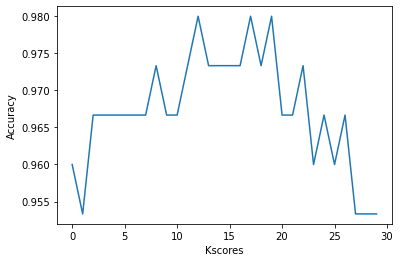

In [11]:
import matplotlib.pyplot as plt
plt.plot(k_scores)
plt.xlabel('Kscores')
plt.ylabel('Accuracy')

Improvements to cross-validation

Repeated cross-validation

    Repeat cross-validation multiple times (with different random splits of the data) and average the results
    More reliable estimate of out-of-sample performance by reducing the variance associated with a single trial of cross-validation

Creating a hold-out set

    "Hold out" a portion of the data before beginning the model building process
    Locate the best model using cross-validation on the remaining data, and test it using the hold-out set
    More reliable estimate of out-of-sample performance since hold-out set is truly out-of-sample

Feature engineering and selection within cross-validation iterations

    Normally, feature engineering and selection occurs before cross-validation
    Instead, perform all feature engineering and selection within each cross-validation iteration
    More reliable estimate of out-of-sample performance since it better mimics the application of the model to out-of-sample data

